## Fields in the dataset:

- instant: record index

- dteday: date

- season: season (1:spring, 2:summer, 3:fall, 4:winter)

- yr: year (0: 2011, 1: 2012)

- mnth: month (1 to 12)

- hr: hour (0 to 23)

- holiday : whether the day is a holiday or not

- weekday : day of the week

- workingday : if the day is neither weekend nor a holiday is 1, otherwise is 0


- weathersit : 
1. Clear, Few clouds, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds
4. Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

- temp : normalized temperature in Celsius; the values are divided to 41 (max)

- atemp: normalized temperature felt in Celsius; the values are divided to 50 (max)

- hum: normalized humidity; the values are divided to 100 (max)

- windspeed: normalized wind speed; the values are divided to 67 (max)

- casual: count of casual users

- registered: count of registered users

- cnt: count of total rental bikes including both casual and registered

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict, GridSearchCV;
from sklearn.linear_model import LinearRegression,Ridge;

### 1. Load the data file.

In [2]:
bikeshare_data=pd.read_csv('hour.csv')

In [3]:
bikeshare_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### 2. Check for null values in the data and drop records with NAs.

In [4]:
bikeshare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
bikeshare_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
len(bikeshare_data[bikeshare_data['instant'].isnull()])

0

In [7]:
for i in bikeshare_data.columns:
    print('Number of null values in column ',i, ' are:', len(bikeshare_data[bikeshare_data[i].isnull()]))

Number of null values in column  instant  are: 0
Number of null values in column  dteday  are: 0
Number of null values in column  season  are: 0
Number of null values in column  yr  are: 0
Number of null values in column  mnth  are: 0
Number of null values in column  hr  are: 0
Number of null values in column  holiday  are: 0
Number of null values in column  weekday  are: 0
Number of null values in column  workingday  are: 0
Number of null values in column  weathersit  are: 0
Number of null values in column  temp  are: 0
Number of null values in column  atemp  are: 0
Number of null values in column  hum  are: 0
Number of null values in column  windspeed  are: 0
Number of null values in column  casual  are: 0
Number of null values in column  registered  are: 0
Number of null values in column  cnt  are: 0


In [8]:
bikeshare_data.dropna(inplace=True);
bikeshare_data.reset_index(inplace=True,drop=True)

### 3. Sanity checks:

- Check if registered + casual = cnt for all the records. If not, the row is junk and should be dropped.



In [9]:
bikeshare_data=bikeshare_data[(bikeshare_data['registered']+bikeshare_data['casual'])==bikeshare_data['cnt']]
bikeshare_data.reset_index(inplace=True,drop=True)

- Month values should be 1-12 only


In [10]:
bikeshare_data=bikeshare_data[(bikeshare_data['mnth']>=1) & (bikeshare_data['mnth']<=12)]
bikeshare_data.reset_index(inplace=True,drop=True)


- Hour values should be 0-23

In [11]:
bikeshare_data=bikeshare_data[(bikeshare_data['hr']>=0) & (bikeshare_data['hr']<=23)]
bikeshare_data.reset_index(inplace=True,drop=True)

In [12]:
bikeshare_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### 4. Drop redundancy (Basic preprocessing)
- The variables ‘casual’ and ‘registered’ are redundant and need to be dropped. 
- ‘Instant’ is the index and needs to be dropped too. 
- The date column dteday will not be used in the model building, and therefore needs to be dropped. 
- Create a new dataframe named inp1.

In [13]:
inp1=bikeshare_data.drop(axis=1,columns=['casual','registered','instant','dteday'])

In [14]:
inp1

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


### 5. Univariate analysis: 

- Describe the numerical fields in the dataset using pandas describe method.

In [15]:
inp1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


**Make density plot for temp.**
- This would give a sense of the centrality and the spread of the distribution.

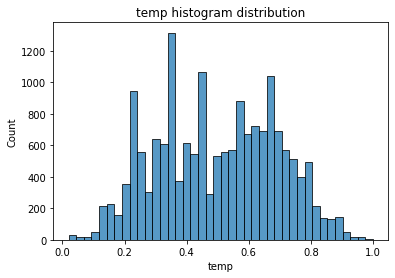

In [16]:
fig1,ax1=plt.subplots(1,1);
sns.histplot(data=inp1,x='temp',ax=ax1);
ax1.set_title('temp histogram distribution',fontsize=12);

**Boxplot for atemp**
- Are there any outliers?

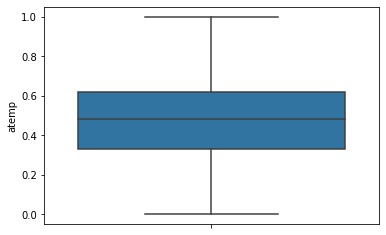

In [17]:
sns.boxplot(data=inp1,y='atemp');

No significant outlier observed for atemp

**Histogram for hum**

- Do you detect any abnormally high values?


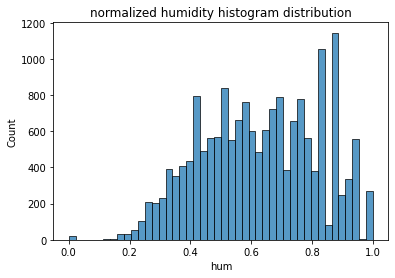

In [18]:
fig2,ax2=plt.subplots(1,1);
sns.histplot(data=inp1,x='hum',ax=ax2);
ax2.set_title('normalized humidity histogram distribution',fontsize=12);

- Very high humidity is observed but it is not abnormal since there are significant number of instances of such high humidity
- Infact, very low humidity value is outlier

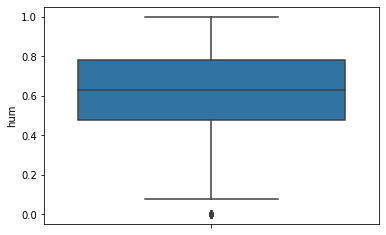

In [19]:
sns.boxplot(data=inp1,y='hum');

**Density plot for windspeed**

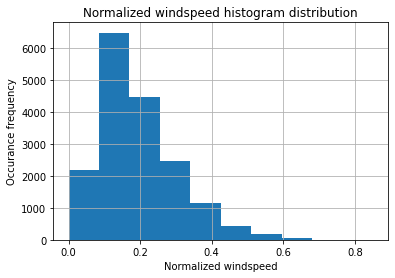

In [20]:
fig3,ax3=plt.subplots(1,1);
inp1.hist(column='windspeed',ax=ax3);
ax3.set_title('Normalized windspeed histogram distribution',fontsize=12);
ax3.set_xlabel('Normalized windspeed',fontsize=10);
ax3.set_ylabel('Occurance frequency',fontsize=10);

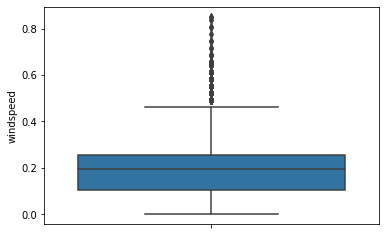

In [21]:
sns.boxplot(data=inp1,y='windspeed');

**Box and density plot for cnt – this is the variable of interest**


- Do you see any outliers in the boxplot? 

- Does the density plot provide a similar insight?

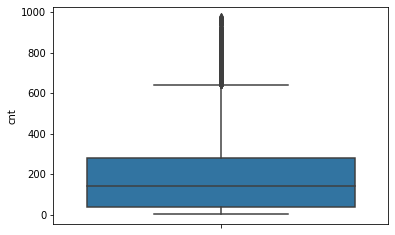

In [22]:
sns.boxplot(data=inp1,y='cnt');

##### Outliers are observed in the boxplot

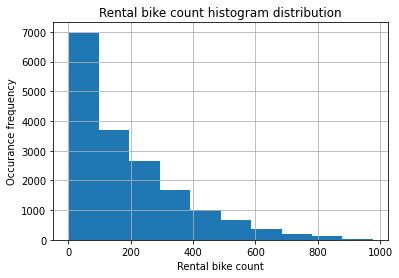

In [23]:
fig4,ax4=plt.subplots(1,1);
inp1.hist(column='cnt',ax=ax4);
ax4.set_title('Rental bike count histogram distribution',fontsize=12);
ax4.set_xlabel('Rental bike count',fontsize=10);
ax4.set_ylabel('Occurance frequency',fontsize=10);

### 6. Outlier treatment:  

- Cnt looks like some hours have rather high values. 
- You’ll need to treat these outliers so that they don’t skew the analysis and the model. 

- Find out the following percentiles: 10, 25, 50, 75, 90, 95, 99

- Decide the cutoff percentile and drop records with values higher than the cutoff. Name the new dataframe as inp2.

In [24]:
np.percentile(inp1['cnt'],q=[10,25,50,75,90,95,97,99])

array([  9.  ,  40.  , 142.  , 281.  , 451.2 , 563.1 , 638.  , 782.22])

In [25]:
IQR=281+1.5*(281 -40)

In [26]:
IQR

642.5

In [27]:
temp1=inp1.drop(index=inp1[inp1['cnt']>650].index)

In [28]:
inp2=temp1.reset_index(drop=True)

### 7. Bivariate analysis


**Make boxplot for cnt vs. hour**

- What kind of pattern do you see?

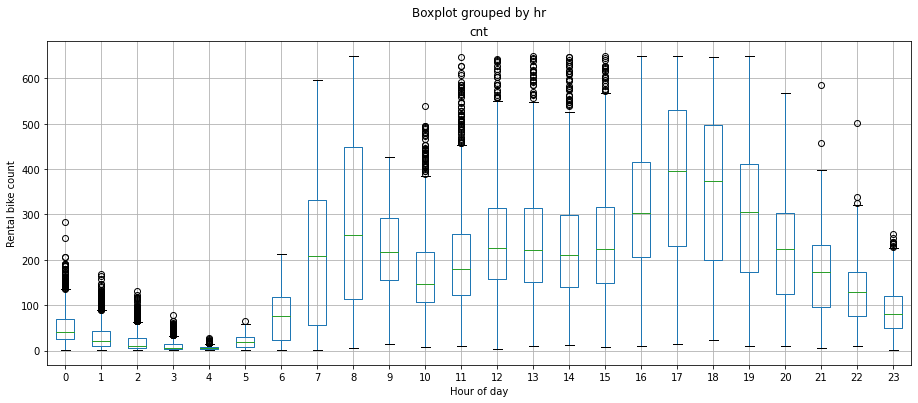

In [29]:
fig5,ax5=plt.subplots(1,1, figsize=(15,6));
inp2.boxplot(column='cnt',by='hr',ax=ax5);
ax5.set_xlabel('Hour of day',fontsize=10);
ax5.set_ylabel('Rental bike count',fontsize=10);

- Based on observation more bikes are rented between 7 hours to 21 hours 
- Peak time observed to be between 16 to 19 hours

In [30]:
inp2[['cnt','hr']].corr()

,cnt,hr
cnt,1.000000,0.419212
hr,0.419212,1.000000


**Make boxplot for cnt vs. weekday**

- Is there any difference in the rides by days of the week?

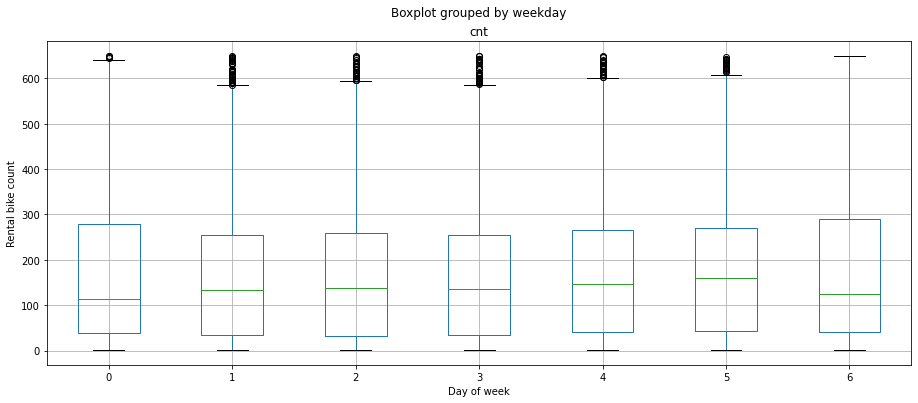

In [31]:
fig6,ax6=plt.subplots(1,1, figsize=(15,6));
inp2.boxplot(column='cnt',by='weekday',ax=ax6);
ax6.set_xlabel('Day of week',fontsize=10);
ax6.set_ylabel('Rental bike count',fontsize=10);

- Similar rental bike share count is observed on all days of week
- Difficult to differentiate

In [32]:
inp2[['cnt','weekday']].corr()

,cnt,weekday
cnt,1.00000,0.02378
weekday,0.02378,1.00000


**Make boxplot for cnt vs. month**

- Look at the median values. Any month(s) that stand out?

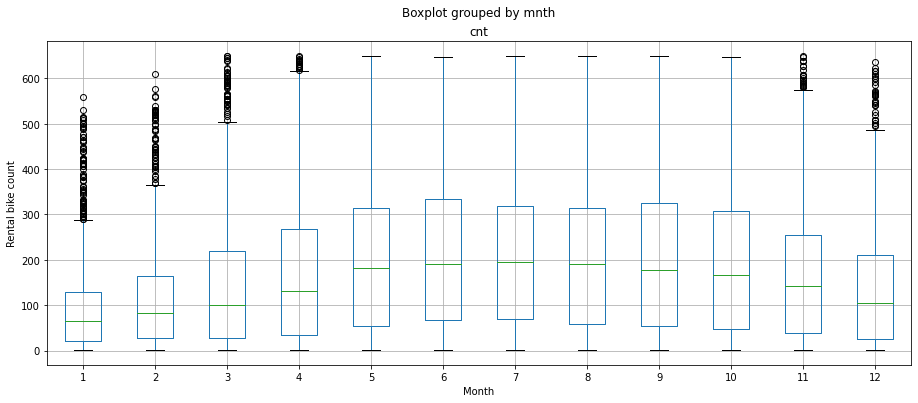

In [33]:
fig7,ax7=plt.subplots(1,1, figsize=(15,6));
inp2.boxplot(column='cnt',by='mnth',ax=ax7);
ax7.set_xlabel('Month',fontsize=10);
ax7.set_ylabel('Rental bike count',fontsize=10);

- Month 5 to 10 have similar distribution

In [34]:
inp2[['cnt','mnth']].corr()

,cnt,mnth
cnt,1.000000,0.115148
mnth,0.115148,1.000000


**Make boxplot for cnt vs. season**

- Which season has the highest rides in general? Expected?

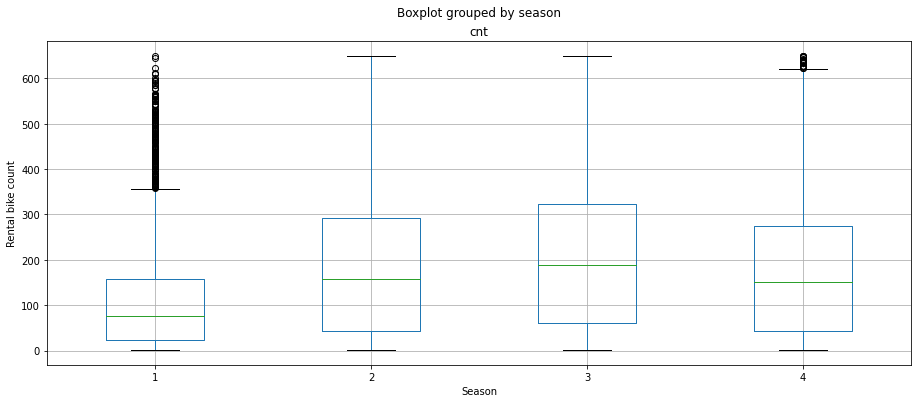

In [35]:
fig8,ax8=plt.subplots(1,1, figsize=(15,6));
inp2.boxplot(column='cnt',by='season',ax=ax8);
ax8.set_xlabel('Season',fontsize=10);
ax8.set_ylabel('Rental bike count',fontsize=10);

- Fall season appears to have more riders, followed by summer and winter, followed by spring.

In [36]:
inp2[['cnt','season']].corr()

,cnt,season
cnt,1.000000,0.172791
season,0.172791,1.000000



**Make a bar plot with the median value of cnt for each hr**

Does this paint a different picture from the box plot?

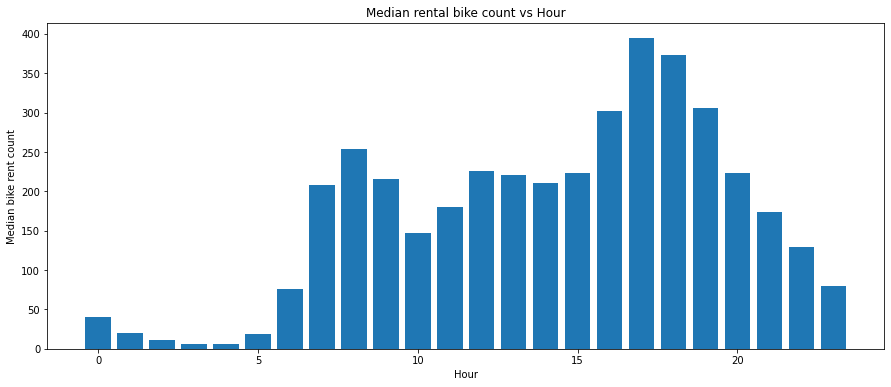

In [37]:
med_cnt=[];
for val in inp2.hr.unique():
    med_cnt.append(inp2[inp2['hr']==val]['cnt'].median());
fig9,ax9=plt.subplots(1,1, figsize=(15,6));
ax9.bar(x=inp2.hr.unique(),height=med_cnt);
ax9.set_title('Median rental bike count vs Hour',fontsize=12);
ax9.set_xlabel('Hour',fontsize=10);
ax9.set_ylabel('Median bike rent count',fontsize=10);

Make a correlation matrix for variables atemp, temp, hum, and windspeed

Which variables have the highest correlation?

In [38]:
inp2[['atemp','temp','hum','windspeed']].corr()

,atemp,temp,hum,windspeed
atemp,1.000000,0.988283,-0.038183,-0.068444
temp,0.988283,1.000000,-0.055624,-0.028413
hum,-0.038183,-0.055624,1.000000,-0.289056
windspeed,-0.068444,-0.028413,-0.289056,1.000000


- Temp and atemp have very high positive correlation (0.988)
- hum and windspeed have reasonably significant negative correlation (-0.289) implies inverse relation

### 8. Data preprocessing

###### A few key considerations for the preprocessing: 

###### There are plenty of categorical features. Since these categorical features can’t be used in the predictive model, you need to convert to a suitable numerical representation. Instead of creating dozens of new dummy variables, try to club levels of categorical features wherever possible. For a feature with high number of categorical levels, you can club the values that are very similar in value for the target variable. 

**Treating mnth column**

- For values 5,6,7,8,9,10, replace with a single value 5. This is because these have very similar values for cnt.

- Get dummies for the updated 6 mnth values

In [39]:
inp2['mnth']=inp2['mnth'].apply(lambda val: 5 if((val>=5) & (val<=10)) else val);

In [40]:
inp2.mnth.value_counts()

5     8410
12    1470
3     1441
1     1429
11    1418
4     1396
2     1341
Name: mnth, dtype: int64

**Treating hr column**

- Create new mapping: 0-5: 0, 11-15: 11; other values are untouched. 
- Again, the bucketing is done in a way that hr values with similar levels of cnt are treated the same.

In [41]:
inp2['hr']=inp2['hr'].apply(lambda val: 0 if((val>=0) & (val<=5)) else 11 if((val>=11) & (val<=15)) else val);

- Get dummy columns for season, weathersit, weekday, mnth, and hr. 
- You needn’t club these further as the levels seem to have different values for the median cnt, when seen from the box plots.

In [42]:
inp2=pd.get_dummies(data=inp2,columns=['season','weathersit','weekday','mnth','hr'],drop_first=True);

In [43]:
inp2

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,hr_10,hr_11,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,0,0,0,0.24,0.2879,0.81,0.0000,16,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0000,40,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0000,32,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0000,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16900,1,0,1,0.26,0.2576,0.60,0.1642,119,0,0,...,0,0,0,0,0,1,0,0,0,0
16901,1,0,1,0.26,0.2576,0.60,0.1642,89,0,0,...,0,0,0,0,0,0,1,0,0,0
16902,1,0,1,0.26,0.2576,0.60,0.1642,90,0,0,...,0,0,0,0,0,0,0,1,0,0
16903,1,0,1,0.26,0.2727,0.56,0.1343,61,0,0,...,0,0,0,0,0,0,0,0,1,0


### 9. Train test split: Apply 70-30 split.

- call the new dataframes df_train and df_test 

In [44]:
df_train,df_test=train_test_split(inp2,test_size=0.3);

In [45]:
print(inp2.shape)
print(df_train.shape)
print(df_test.shape)

(16905, 40)
(11833, 40)
(5072, 40)


### 10. Separate X and Y for df_train and df_test. For example, you should have X_train, y_train from df_train. y_train should be the cnt column from inp3 and X_train should be all other columns.

In [46]:
X_train=df_train.drop(axis=1,columns='cnt');
y_train=df_train.cnt;
X_test=df_test.drop(axis=1,columns='cnt');
y_test=df_test.cnt;
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11833, 39)
(11833,)
(5072, 39)
(5072,)


###  Model building

### Use linear regression as the technique

### Report the R2 on the train set

In [47]:
lr=LinearRegression();
cvs=cross_val_score(lr,X_train,y_train,n_jobs=-1,cv=10)

In [48]:
print(cvs)
print("Average R2 cross-validation score = ",np.mean(cvs))

[0.66746509 0.66514012 0.67440653 0.68423613 0.68611519 0.65230796
 0.66118104 0.67037786 0.65069888 0.6363839 ]
Average R2 cross-validation score =  0.6648312690418552


In [49]:
grid_pred=GridSearchCV(Ridge(),[{'alpha':[0,0.1,1,10,100],'fit_intercept':[True,False],'normalize':[True,False]}],n_jobs=-1,cv=10);

In [50]:
grid_pred.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [0, 0.1, 1, 10, 100],
                          'fit_intercept': [True, False],
                          'normalize': [True, False]}])

In [51]:
grid_pred.best_estimator_

Ridge(alpha=1)

In [52]:
grid_pred.best_score_

0.6648984116893815

In [53]:
grid_pred.cv_results_['mean_test_score']

array([0.66483037, 0.66483438, 0.65851848, 0.65851848, 0.64296349,
       0.66485916, 0.65851877, 0.65851877, 0.4466963 , 0.66489841,
       0.65854433, 0.65854433, 0.12810577, 0.66357029, 0.65734287,
       0.65734287, 0.01575038, 0.61022228, 0.60962048, 0.60962048])

### Since best Ridge regression R2 score is very close to the LinearRegression R2 score, LinearRegression can be used directly

In [54]:
lr_model=LinearRegression();
lr_model.fit(X_train,y_train);

In [55]:
print('R^2 score on training set =',lr_model.score(X_train,y_train))

R^2 score on training set = 0.6677954641695163


### 11. Make predictions on test set and report R2.

In [56]:
print('R^2 score on test set =',lr_model.score(X_test,y_test))

R^2 score on test set = 0.6750756883049609


In [57]:
pred=pd.Series(lr_model.predict(X_test),name='prediction')

In [58]:
y_test.reset_index(inplace=True,drop=True)

In [59]:
y_test

0       202
1       212
2        10
3       316
4       238
       ... 
5067     62
5068    302
5069    157
5070     17
5071    165
Name: cnt, Length: 5072, dtype: int64

In [60]:
pred_vs_target=pd.concat([pred,y_test],axis=1,join='inner')

In [61]:
pred_vs_target

,prediction,cnt
0,228.531160,202
1,257.222169,212
2,162.981993,10
3,290.572046,316
4,288.958825,238
...,...,...
5067,80.494814,62
5068,317.091798,302
5069,130.797359,157
5070,126.711977,17


In [62]:
lr_model.intercept_

-92.34839078834315

In [63]:
lr_model.coef_

array([ 6.78583506e+01, -2.60355601e+12, -2.60355601e+12,  1.06845248e+02,
        1.08679980e+02, -6.71936522e+01, -2.40209781e+01,  3.65085277e+01,
        2.20658865e+01,  6.13162117e+01, -5.72439774e+00, -6.04823367e+01,
       -4.77318240e+01,  2.60355601e+12,  2.60355601e+12,  2.60355601e+12,
        2.60355601e+12,  2.60355601e+12,  1.03195635e+01,  5.61027787e+00,
        1.57930625e+01,  5.67988933e+00,  1.60296061e+01, -3.46790950e+00,
       -3.87448316e+00,  6.03698577e+01,  1.99157925e+02,  2.74504088e+02,
        1.88735988e+02,  1.37095080e+02,  1.80862082e+02,  2.51755309e+02,
        3.35646154e+02,  3.09171875e+02,  2.61897919e+02,  1.85391724e+02,
        1.33871429e+02,  9.72513123e+01,  5.90430908e+01])

In [64]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3',
       'weathersit_4', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_11', 'mnth_12', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11',
       'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [66]:
print("Final Model is-")
printing_model=y_train.name+'='+str(lr_model.intercept_);
for idx in range(len(lr_model.coef_)):
    if (lr_model.coef_[idx]>=0):
        printing_model+='+';
    printing_model+=str(lr_model.coef_[idx]);
    printing_model+='*';
    printing_model+=X_train.columns[idx];
    
print(printing_model)

Final Model is-
cnt=-92.34839078834315+67.85835062879508*yr-2603556006821.9375*holiday-2603556006805.6445*workingday+106.84524807513878*temp+108.67997963417028*atemp-67.19365223570891*hum-24.020978076052817*windspeed+36.50852773094534*season_2+22.06588649537043*season_3+61.31621172637513*season_4-5.724397738158722*weathersit_2-60.482336724221746*weathersit_3-47.73182395138342*weathersit_4+2603556006809.5146*weekday_1+2603556006808.7446*weekday_2+2603556006810.0796*weekday_3+2603556006809.0503*weekday_4+2603556006816.2036*weekday_5+10.319563542771833*weekday_6+5.61027787180315*mnth_2+15.793062494012252*mnth_3+5.679889328072081*mnth_4+16.02960611445359*mnth_5-3.467909497192148*mnth_11-3.8744831615054585*mnth_12+60.369857669199746*hr_6+199.15792492032068*hr_7+274.5040880259614*hr_8+188.73598810312674*hr_9+137.0950798850466*hr_10+180.8620818594903*hr_11+251.75530914677108*hr_16+335.6461541236193*hr_17+309.171875*hr_18+261.8979187011719*hr_19+185.3917236328125*hr_20+133.87142944335938*hr_21